## <font color=purple>NLP and Topic Modelling, and latent semantic analysis</font>

Large scale of text
Semantic structures
Latent syntatic - visible when doing NLP but maybe not on individuals
Topic modelling is the step right after data prep - a way of describing the data
Term-frequency matrix - words are counted in each doc/element
Unsupervised learning!
LSA vs LDA: same input, similar output, different math

first step is to convert text into numerical for the algorithm
with help from a document-term frequency matrix
words = vocubulary
corpus = input = document-term frequency matrix

two outputs = documents specific and word specific
where LDA's output is statistics output (topics, words and topics)



Graph database is an alternative to relational databases. 

## <font color=purple>Mechanics of LDA</font>

See the parameters of LDA. 

In [41]:
#importing packages and dataset
#type+2+diabetes_500.csv

import pandas as pd
import re
import string
from wordcloud import WordCloud


# Read data into papers
papers = 'type+2+diabetes_500.csv'
data = pd.read_csv(papers,encoding= 'unicode_escape')

#Print head
data.head(10)

,Unnamed: 0,Authors,ArticleTitle,Date,Abstract,Keywords,Affiliations
0,0,"C. Xu, J. Zhong, H. Zhu, R. Hu, L. Fang, M. Wa...","""Independent and interactive associations of h...",Jul. 2019,"""An elevated heart rate has been reported to b...","Heart rate, Interaction, TypeÂ 2 diabetes mell...","""Department of Chronic Non-Communicable Diseas..."
1,1,"K. Kaneko, H. Yatsuya, Y. Li, M. Uemura, C. Ch...","""Association of gamma-glutamyl transferase and...",May. 2019,"""To prospectively investigate whether simultan...","Alanine aminotransferase, Gamma-glutamyl trans...","""Department of Public Health and Health System..."
2,2,"Z. Jing, J. Chu, Z. Imam Syeda, X. Zhang, Q. X...","""Catastrophic health expenditure among type 2 ...",Mar. 2019,"""Diabetes mellitus often causes high economic ...","Catastrophic health expenditure, Determinants,...","""School of Public, Health Shandong University,..."
3,3,"C. Yu, Q. Lei, J. Wang, X. Han, F. Wang, J. Yu...","""Serum carbohydrate antigen 125 levels and inc...",Sep. 2019,"""The aim of this study was to investigate the ...","Serum carbohydrate antigen 125, incidence, pro...","""1 Department of Occupational and Environmenta..."
4,4,"S. Irie, T. Anno, F. Kawasaki, R. Shigemoto, H...","""Acute exacerbation of chronic osteomyelitis t...",Jan. 2019,"""Osteomyelitis is an infection in a bone. Acut...","Case report, Immunocompromised host, Osteomyel...","""Department of General Internal Medicine 1, Ka..."
5,5,"A. GonzÃ¡lez-Burboa, C. Acevedo Cossio, A. Ver...","""Psychological interventions for patients with...",Nov. 2019,"""Background Affordable interventions to improv...",NaN,"""Departamento de Salud PÃºblica, Facultad de M..."
6,6,"S. Rattik, D. Engelbertsen, M. Wigren, I. Ljun...","""Elevated circulating effector memory T cells ...",May. 2019,"""Type 2 diabetes mellitus is associated with a...","Type 2 diabetes, adaptive immunity, cardiovasc...","""Department of Clinical Sciences, Lund Univers..."
7,7,"J. Wang, HB. Xu, HP. Zhang, JL. Chen, SB. Qiao...","""Impact of type 2 diabetes mellitus on the pro...",May. 2020,"""Objective: To investigate the impact of type ...","Coronary artery disease, Coronary non-target l...","""Coronary Heart Disease Center, Fuwai Hospital..."
8,8,"E. Gkaliagkousi, B. Nikolaidou, E. Gavriilaki,...","""Increased erythrocyte- and platelet-derived m...",Sep. 2019,"""To investigate the thrombotic microenvironmen...","Diabetes mellitus, glucose, glycated haemoglob...","""1 3rd Department of Internal Medicine, Papage..."
9,9,"J. Li, YF. Cao, XY. Sun, L. Han, SN. Li, WQ. G...","""Plasma tyrosine and its interaction with low ...",Mar. 2019,"""Metabolomic markers have the potential to imp...","Amino acids, Lipoprotein, Type 2 diabetes,","""Department of Epidemiology and Biostatistics,..."


In [42]:
data.drop(columns=['Unnamed: 0', 'Date', 'Authors', 'Affiliations'], inplace=True)

In [43]:
#remove punctuation

data['ArticleTitle_cleaned'] = data['ArticleTitle'].map(lambda x: re.sub('[,\.?]','',x))
data['Abstract_cleaned'] = data['Abstract'].map(lambda x: re.sub('[,\.?]','',x))
#data['ArticleTitle_cleaned'] = data['Keywords'].map(lambda x: re.sub('[,\.?]','',x))

<>:3: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-43-b8a0cf36e2d1>:3: DeprecationWarning: invalid escape sequence \.
  data['ArticleTitle_cleaned'] = data['ArticleTitle'].map(lambda x: re.sub('[,\.?]','',x))
<ipython-input-43-b8a0cf36e2d1>:4: DeprecationWarning: invalid escape sequence \.
  data['Abstract_cleaned'] = data['Abstract'].map(lambda x: re.sub('[,\.?]','',x))


In [44]:
data.head(5)

,ArticleTitle,Abstract,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,"""Independent and interactive associations of h...","""An elevated heart rate has been reported to b...","Heart rate, Interaction, TypeÂ 2 diabetes mell...","""Independent and interactive associations of h...","""An elevated heart rate has been reported to b..."
1,"""Association of gamma-glutamyl transferase and...","""To prospectively investigate whether simultan...","Alanine aminotransferase, Gamma-glutamyl trans...","""Association of gamma-glutamyl transferase and...","""To prospectively investigate whether simultan..."
2,"""Catastrophic health expenditure among type 2 ...","""Diabetes mellitus often causes high economic ...","Catastrophic health expenditure, Determinants,...","""Catastrophic health expenditure among type 2 ...","""Diabetes mellitus often causes high economic ..."
3,"""Serum carbohydrate antigen 125 levels and inc...","""The aim of this study was to investigate the ...","Serum carbohydrate antigen 125, incidence, pro...","""Serum carbohydrate antigen 125 levels and inc...","""The aim of this study was to investigate the ..."
4,"""Acute exacerbation of chronic osteomyelitis t...","""Osteomyelitis is an infection in a bone. Acut...","Case report, Immunocompromised host, Osteomyel...","""Acute exacerbation of chronic osteomyelitis t...","""Osteomyelitis is an infection in a bone Acute..."


In [45]:
#dropping ArticleTitle since it is now cleaned

data.drop(columns=['ArticleTitle'], inplace=True)
data.drop(columns=['Abstract'], inplace=True)

In [46]:
data.head()

,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,"Heart rate, Interaction, TypeÂ 2 diabetes mell...","""Independent and interactive associations of h...","""An elevated heart rate has been reported to b..."
1,"Alanine aminotransferase, Gamma-glutamyl trans...","""Association of gamma-glutamyl transferase and...","""To prospectively investigate whether simultan..."
2,"Catastrophic health expenditure, Determinants,...","""Catastrophic health expenditure among type 2 ...","""Diabetes mellitus often causes high economic ..."
3,"Serum carbohydrate antigen 125, incidence, pro...","""Serum carbohydrate antigen 125 levels and inc...","""The aim of this study was to investigate the ..."
4,"Case report, Immunocompromised host, Osteomyel...","""Acute exacerbation of chronic osteomyelitis t...","""Osteomyelitis is an infection in a bone Acute..."


In [47]:
#dropping the columns after cleaning

#data.drop(columns=['Abstract', 'Keywords'], inplace=True)

In [48]:
#convert everything to lowercase

data['ArticleTitle_cleaned'] = data['ArticleTitle_cleaned'].map(lambda x: x.lower())

In [49]:
#convert everything to lowercase

data['Abstract_cleaned'] = data['Abstract_cleaned'].map(lambda x: x.lower())

In [50]:
#data['Keywords'] = data['Keywords'].map(lambda x: x.lower())

In [51]:
data.head(5)

,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,"Heart rate, Interaction, TypeÂ 2 diabetes mell...","""independent and interactive associations of h...","""an elevated heart rate has been reported to b..."
1,"Alanine aminotransferase, Gamma-glutamyl trans...","""association of gamma-glutamyl transferase and...","""to prospectively investigate whether simultan..."
2,"Catastrophic health expenditure, Determinants,...","""catastrophic health expenditure among type 2 ...","""diabetes mellitus often causes high economic ..."
3,"Serum carbohydrate antigen 125, incidence, pro...","""serum carbohydrate antigen 125 levels and inc...","""the aim of this study was to investigate the ..."
4,"Case report, Immunocompromised host, Osteomyel...","""acute exacerbation of chronic osteomyelitis t...","""osteomyelitis is an infection in a bone acute..."


In [52]:
data['Keywords'] = data['Keywords'].str.lower()

In [53]:
data.head(5)

,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,"heart rate, interaction, typeâ 2 diabetes mell...","""independent and interactive associations of h...","""an elevated heart rate has been reported to b..."
1,"alanine aminotransferase, gamma-glutamyl trans...","""association of gamma-glutamyl transferase and...","""to prospectively investigate whether simultan..."
2,"catastrophic health expenditure, determinants,...","""catastrophic health expenditure among type 2 ...","""diabetes mellitus often causes high economic ..."
3,"serum carbohydrate antigen 125, incidence, pro...","""serum carbohydrate antigen 125 levels and inc...","""the aim of this study was to investigate the ..."
4,"case report, immunocompromised host, osteomyel...","""acute exacerbation of chronic osteomyelitis t...","""osteomyelitis is an infection in a bone acute..."


In [54]:
data["Keywords"] = data['Keywords'].str.replace('[^\w\s]','')


<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
<ipython-input-54-4c917431ab76>:1: DeprecationWarning: invalid escape sequence \w
  data["Keywords"] = data['Keywords'].str.replace('[^\w\s]','')


In [55]:
data.head()

,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,heart rate interaction typeâ 2 diabetes mellitus,"""independent and interactive associations of h...","""an elevated heart rate has been reported to b..."
1,alanine aminotransferase gammaglutamyl transfe...,"""association of gamma-glutamyl transferase and...","""to prospectively investigate whether simultan..."
2,catastrophic health expenditure determinants t...,"""catastrophic health expenditure among type 2 ...","""diabetes mellitus often causes high economic ..."
3,serum carbohydrate antigen 125 incidence prosp...,"""serum carbohydrate antigen 125 levels and inc...","""the aim of this study was to investigate the ..."
4,case report immunocompromised host osteomyelit...,"""acute exacerbation of chronic osteomyelitis t...","""osteomyelitis is an infection in a bone acute..."


In [56]:
# Print out the first rows of papers
data['ArticleTitle_cleaned'].head()

0    "independent and interactive associations of h...
1    "association of gamma-glutamyl transferase and...
2    "catastrophic health expenditure among type 2 ...
3    "serum carbohydrate antigen 125 levels and inc...
4    "acute exacerbation of chronic osteomyelitis t...
Name: ArticleTitle_cleaned, dtype: object

In [57]:
# Join the different processed titles together.
long_string = ','.join(list(data['ArticleTitle_cleaned'].values))

In [58]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)

In [59]:
# Generate a word cloud
wordcloud.generate(long_string)

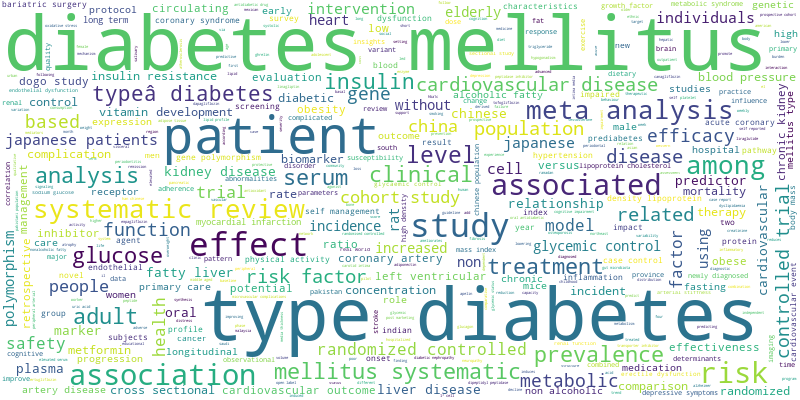

In [60]:
# Visualize the word cloud
wordcloud.to_image()

## <font color=purple>LDA Analysis</font>

In [61]:
#let us transform the textual data that will serve as an input for training LDA model

#first, convert the docs into a simple vector representation (bag of words BOW)
#next, converte a list of titles into list of vectors - lenght equal to vocubulary
#then olot the ten most frequent words based on this outcome (list of doc vectors)

#CHECK that these words occur in the word cloud in the end!

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [63]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

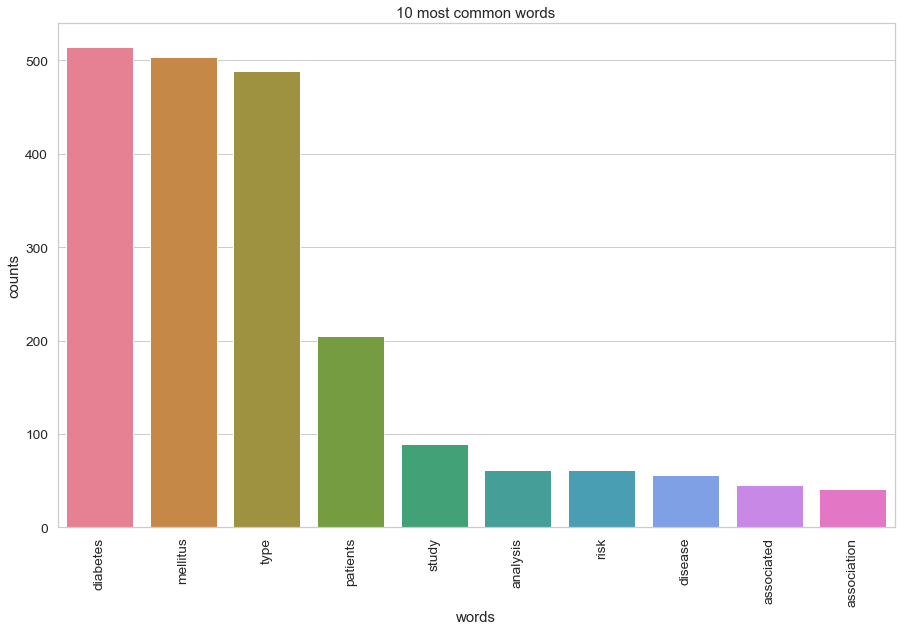

In [64]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['ArticleTitle_cleaned'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [65]:
#to keep everything simple, i will tweask the number of topic parameters

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
mellitus diabetes type patients trial term controlled risk management individuals

Topic #1:
diabetes mellitus type patients association study population gene japanese chinese

Topic #2:
mellitus diabetes type cardiovascular risk analysis review association population systematic

Topic #3:
type mellitus diabetes disease fatty patients liver alcoholic non glucose

Topic #4:
mellitus diabetes type patients myocardial infarction effects effect comparison dapagliflozin

Topic #5:
type mellitus diabetes patients study risk disease analysis cross sectional

Topic #6:
diabetes mellitus type study risk patients glucose cohort associated population

Topic #7:
diabetes mellitus type patients analysis meta review systematic study associated

Topic #8:
diabetes type mellitus patients study association risk control associated clinical

Topic #9:
diabetes mellitus type patients study cardiovascular acute coronary glycemic syndrome


In [66]:
#convert text to corpus (document-term frequency matrix

tf_vectorizer = CountVectorizer(strip_accents = 'unicode', 
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
dtm_tf = tf_vectorizer.fit_transform(data['ArticleTitle_cleaned'])
print(dtm_tf.shape)

(500, 1726)


In [67]:
#now i have trained the model - then let us visualizee the topics for interpretability
#I use pyLDAvis to visualise:
    #1)better understanding and interpreting indv. topics
    #2)better understand the relationships bw the topics

#For (1), you can manually select each topic to view its top most frequent
#and/or “relevant” terms, using different values of the λ parameter. 
#This can help when you’re trying to assign a human interpretable 
#name or “meaning” to each topic.


#For (2), exploring the Intertopic Distance Plot can 
#help you learn about how topics relate to each other, 
#including potential higher-level structure between groups of topics.



In [68]:
lda_tf = LDA(n_components=10, random_state=0)
#n_components are topics


In [69]:
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [70]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
#where lda_tf is my LDA object
#where dmt_tf is my numeric representation
#where tf_vectorizer is my whole vocubulary

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.083203 -0.049535       1        1  23.592594
3     -0.068483 -0.052739       2        1  21.294137
2     -0.085338  0.056310       3        1  17.628571
5     -0.098800  0.028322       4        1  13.486349
9     -0.008293 -0.087235       5        1   6.756162
0      0.006310  0.132544       6        1   6.156779
6      0.043634 -0.015979       7        1   4.034332
1      0.066696 -0.041382       8        1   3.393102
8      0.076148  0.036256       9        1   2.937555
7      0.151329 -0.006562      10        1   0.720418, topic_info=            Term        Freq       Total Category  logprob  loglift
410      disease   43.000000   43.000000  Default  30.0000  30.0000
933     mellitus  411.000000  411.000000  Default  29.0000  29.0000
386     diabetes  420.000000  420.000000  Default  28.0000  28.0000
1547  systematic   29.000000   29.000000  Default  27.0000  27.0000
1387      review   33.000000   33.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1073       obese    0.026705    7.389980  Topic10  -7.4536  -0.6899
1241  prevalence    0.026705   22.513404  Topic10  -7.4536  -1.8039
71       altered    0.026705    1.542240  Topic10  -7.4536   0.8769
759    influence    0.026705    4.727661  Topic10  -7.4536  -0.2433
776      insulin    0.026705   23.954727  Topic10  -7.4536  -1.8660

[629 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1         6  0.702956           abha
4         2  0.241484  abnormalities
4         7  0.724453  abnormalities
7         7  0.746658       accident
8         3  0.929387      according
...     ...       ...            ...
1705      2  0.150119          women
1711      3  0.813731          world
1720      7  0.746658        younger
1722      2  0.648404         yuhuan
1725      8  0.765071           zinc

[977 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 6, 10, 1, 7, 2, 9, 8])

In [71]:
#as you can see a lot of the words from our words LDA is correct
#each topic is representented as a topic
#the area is the prevallence
#the numbers are sorted after area = nr 1 is the most popular topic.
#the distance bw two circles represents the topic similarity - proxy to the original
#topic similarity matrix because of only 2D to represent the space distribution of similarities

## <font color=purple>LSA - Latent Semantic Analysis</font>

In [72]:
#stopwords are words I do not want to convert into features
#filtering junk in the data w.u of stopwords.

'''LSI (also known as Latent Semantic Analysis, LSA) learns 
latent topics by performing a matrix decomposition (SVD) on 
the term-document matrix.

LDA is a generative probabilistic model, that assumes a 
Dirichlet prior over the latent topics.

In practice, LSI is much faster to train than LDA, but 
has lower accuracy.'''


,Keywords,ArticleTitle_cleaned,Abstract_cleaned
0,heart rate interaction typeâ 2 diabetes mellitus,"""independent and interactive associations of h...","""an elevated heart rate has been reported to b..."
1,alanine aminotransferase gammaglutamyl transfe...,"""association of gamma-glutamyl transferase and...","""to prospectively investigate whether simultan..."
2,catastrophic health expenditure determinants t...,"""catastrophic health expenditure among type 2 ...","""diabetes mellitus often causes high economic ..."
3,serum carbohydrate antigen 125 incidence prosp...,"""serum carbohydrate antigen 125 levels and inc...","""the aim of this study was to investigate the ..."
4,case report immunocompromised host osteomyelit...,"""acute exacerbation of chronic osteomyelitis t...","""osteomyelitis is an infection in a bone acute..."
